# Critical Thinking 3
Using Tensorflow and your own research, write a basic Tensorflow ANN model to perform a basic function of your choosing. Your submission should be inference-ready upon execution, and include all model checkpoints necessary for inference. Your submission should include a self-executable Python script, which model inference can be confirmed. The executable script should visually display results. Accuracy will not be graded but must run without error and display classification results on-screen.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import os
from sklearn.model_selection import train_test_split

batch_size = 100
checkpoint_path = "training_ct3/regression_model.hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor="val_loss", save_weights_only=False, verbose=0, save_freq='epoch', save_best_only=True)



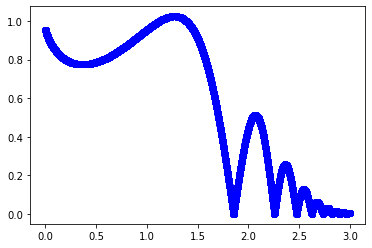

In [2]:

x = []
y = []

for r in range(50000):
    i = random.random() * 3
    x.append(i)
    y.append(abs(math.sin(i**i) / 2 ** (((i ** i) - math.pi/2) / math.pi)))

x = np.array(x)
y = np.array(y)

plt.plot(x,y, 'bo')

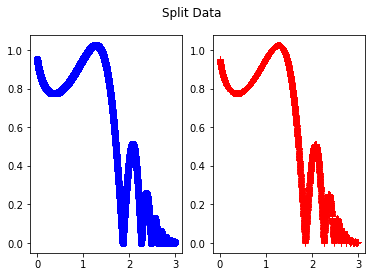

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Split Data")
ax1.plot(x_train, y_train, 'bo')
ax2.plot(x_test, y_test, 'r+')
plt.show()


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='linear', input_shape=[1]),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear'),
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01, decay=1e-3), loss=tf.keras.losses.MeanSquaredError())
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 173,571
Trainable params: 173,571
Non-trainable params: 0
__________________________________________________

2021-09-28 19:16:59.508195: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-28 19:16:59.508477: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 40000 samples, validate on 10000 samples
Epoch 1/200
40000/40000 [==============================] - 3s 83us/sample - loss: 0.0123 - val_loss: 0.0011
Epoch 2/200
40000/40000 [==============================] - 3s 74us/sample - loss: 0.0015 - val_loss: 8.6448e-04
Epoch 3/200
40000/40000 [==============================] - 3s 66us/sample - loss: 0.0010 - val_loss: 8.0065e-04
Epoch 4/200
40000/40000 [==============================] - 3s 66us/sample - loss: 0.0011 - val_loss: 7.5337e-04
Epoch 5/200
40000/40000 [==============================] - 3s 64us/sample - loss: 0.0010 - val_loss: 7.6483e-04
Epoch 6/200
40000/40000 [==============================] - 3s 65us/sample - loss: 8.9845e-04 - val_loss: 7.5572e-04
Epoch 7/200
40000/40000 [==============================] - 3s 65us/sample - loss: 8.7543e-04 - val_loss: 6.9976e-04
Epoch 8/200
40000/40000 [==============================] - 3s 66us/sample - loss: 7.8446e-04 - val_loss: 6.4446e-04
Epoch 9/200
40000/40000 [=====================

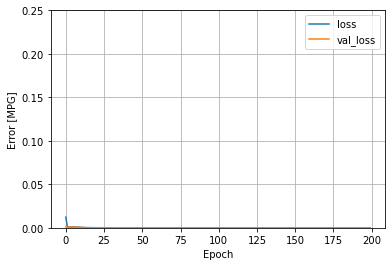

In [5]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, batch_size=batch_size, verbose=1, callbacks=[cp_callback])
plot_loss(history)

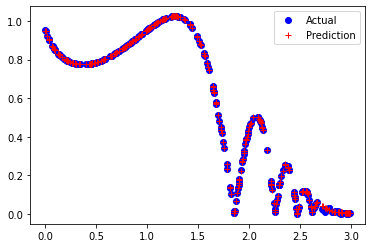

In [6]:
rand_x = []
rand_y = []

for r in range(300):
    i = random.random() * 3
    rand_x.append(i)
    rand_y.append(abs(math.sin(i**i) / 2 ** (((i ** i) - math.pi/2) / math.pi)))

preds = model.predict(rand_x)

plt.plot(rand_x,rand_y, 'bo', label="Actual")
plt.plot(rand_x, preds, 'r+', label="Prediction")
plt.legend()
plt.show()